<a href="https://colab.research.google.com/github/andersonmanhaes/mestrado_cefet_ppcic/blob/main/Disciplinas/ML/T1_Machine_Learning_PPCIC_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 Predição de pagamento de empréstimos (2 pts)**

Uma instituição financeira (fictícia) possui uma base de dados com o histórico de crediário oferecido aos seus clientes. Baseado neste histórico, a instituição deseja investigar a criação de modelos de classificação para inferir se um novo cliente que submeteu uma requisição de empréstimo pagará ou não a dívida, caso o banco resolva realizar esse empréstimo. O objetivo é predizer se um novo cliente pagaria ou não uma dívida contraída, tendo como base as características desse novo cliente. Uma vez treinado, um modelo de classificação para esse problema poderá inferir se um novo cliente irá ou não honrar um eventual empréstimo concedido a ele.

O conjunto de dados a ser utilizado para treinamento possui 1500 exemplos, e contém dados relativos a créditos (empréstimos) concedidos aos clientes da instituição financeira. Esses registros estão contidos no arquivo credtrain.txt, que é fornecido juntamente com esse documento. Para cada cliente, são definidos 11 atributos (variáveis, características). Além disso, a última coluna de cada exemplo informa se o cliente honrou ou não o pagamento do
empréstimo. Na Tabela 1, encontramos a descrição dos atributos.

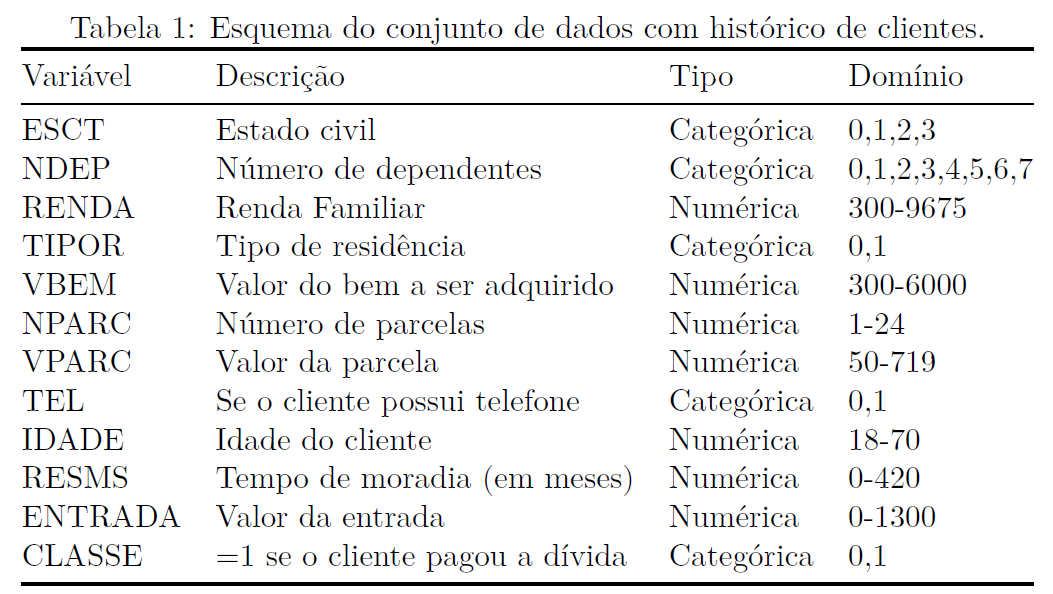

Repare que esse conjunto de dados contém diversos atributos que não são numéricos. Repare também que, dentre os atributos numéricos, há uma grande discrepância entre as suas respectivas faixas de valores. Modelos de redes neurais não podem ser treinados sobre atributos que não são numéricos. Além disso, é sabido que diferenças grandes entre as faixas de valores dos atributos atrapalha o processo de treinamento. Sendo assim, antes de iniciar o treinamento, é preciso realizar diversos passos de pré-processamento sobre esses dados. Esses passos já são fornecidos em um notebook Jupyter.

Você deve criar modelos de classificação por meio dos algoritmos de aprendizado de máquina implementados nas seguintes classes da biblioteca Scikit-Learn:



*   sklearn.linear_model.LogisticRegression
*   sklearn.tree.DecisionTreeClassifier
*   sklearn.ensemble.RandomForestClassifier
*   sklearn.neighbors.KNeighborsClassifier
*   sklearn.ensemble.GradientBoostingClassifier


Por simplicidade, você pode manter os valores default dos hiperparâmetros de cada algoritmo.

Após o treinamento, você deve avaliar a qualidade preditiva dos modelos gerados. Para isso, você deve usar os exemplos contidos no arquivo credtest.txt. Isso permitirá que você avalie o quão efetivo foi o passo de treinamento dos modelos, ou seja, qual o poder preditivo de cada modelo de classificação. Produza a matriz de confusão (confusion matrix) relativa aos resultados da fase de testes (credtest). Apresente também o resultado produzido pela função classification_report do Scikit-Learn.


In [ ]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt #visualization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Carga do dataset de treinamento e teste
names = ["ESCT", "NDEP", "RENDA", "TIPOR", "VBEM", "NPARC", "VPARC", "TEL", "IDADE", "RESMS", "ENTRADA", "CLASSE"]
dataset_train = pd.read_csv("data/credtrain.txt", sep="\t", names=names)
dataset_test = pd.read_csv("data/credtest.txt", sep="\t", names=names)

In [ ]:
# Pré-processamento dos dados
# Visualizar os dados no dataframe
dataset_train.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [ ]:
dataset_test.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


In [ ]:
# Visualizar os tipos dos dados do dataframe
dataset_train.dtypes

ESCT       int64
NDEP       int64
RENDA      int64
TIPOR      int64
VBEM       int64
NPARC      int64
VPARC      int64
TEL        int64
IDADE      int64
RESMS      int64
ENTRADA    int64
CLASSE     int64
dtype: object

In [ ]:
dataset_test.dtypes

ESCT       int64
NDEP       int64
RENDA      int64
TIPOR      int64
VBEM       int64
NPARC      int64
VPARC      int64
TEL        int64
IDADE      int64
RESMS      int64
ENTRADA    int64
CLASSE     int64
dtype: object

In [ ]:
dataset_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [ ]:
dataset_test.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.547660,0.110919,930.623917,0.452340,568.377816,8.402080,103.755633,0.112652,41.188908,29.270364,26.528596,0.469671
std,0.710706,0.511841,876.614452,0.498155,352.600280,3.633065,67.692428,0.316441,13.477631,50.100313,90.786052,0.499512
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,475.000000,0.000000,399.000000,6.000000,66.000000,0.000000,30.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,600.000000,0.000000,489.000000,10.000000,85.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1000.000000,1.000000,623.000000,10.000000,117.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,5.000000,9675.000000,1.000000,6000.000000,21.000000,719.000000,1.000000,70.000000,360.000000,1150.000000,1.000000


In [ ]:
# Verificar se existem valores null
dataset_train.isnull().sum().sum()

0

In [ ]:
# Verificar se existem valores null
dataset_test.isnull().sum().sum()

0

In [ ]:
dataset_train.ESCT.unique()

array([1, 0, 2, 3])

In [ ]:
dataset_test.ESCT.unique()

array([0, 1, 3, 2])

In [ ]:
dataset_train.NDEP.unique()

array([0, 2, 1, 3, 4, 6, 5, 7])

In [ ]:
dataset_test.NDEP.unique()

array([2, 0, 3, 1, 5, 4])

In [ ]:
dataset_test.TIPOR.unique()

array([1, 0])

In [ ]:
dataset_train.TIPOR.unique()

array([0, 1])

In [ ]:
dataset_test.TEL.unique()

array([0, 1])

In [ ]:
dataset_train.TEL.unique()

array([0, 1])

In [ ]:
dataset_test.CLASSE.unique()

array([0, 1])

In [ ]:
dataset_train.CLASSE.unique()

array([1, 0])

In [ ]:
# diferenças grandes entre as faixas de valores dos atributos atrapalha o processo de treinamento
# Normalização dos dados
scaler = StandardScaler()
#scaler.transform(dataset_train.drop(["ESCT", "NDEP", "TIPOR", "TEL", "CLASSE"], axis=1))

# Transformar os dados de treino e teste
#dataset_train_norm = scaler.transform(dataset_train.drop(["ESCT", "NDEP", "TIPOR", "TEL", "CLASSE"], axis=1))
#dataset_test_norm = scaler.transform(dataset_test.drop(["ESCT", "NDEP", "TIPOR", "TEL", "CLASSE"], axis=1))

# diferenças grandes entre as faixas de valores dos atributos atrapalha o processo de treinamento
# Normalizar os dados
#scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(dataset_train.drop(["ESCT", "NDEP", "TIPOR", "TEL", "CLASSE"], axis=1))
scaled_features_test = scaler.fit_transform(dataset_test.drop(["ESCT", "NDEP", "TIPOR", "TEL", "CLASSE"], axis=1))
dataset_train[dataset_train.columns.difference(["ESCT", "NDEP", "TIPOR", "TEL", "CLASSE"])] = scaled_features_train
dataset_test[dataset_test.columns.difference(["ESCT", "NDEP", "TIPOR", "TEL", "CLASSE"])] = scaled_features_test

In [ ]:
dataset_train.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,-0.798003,0,0.312878,0.168333,-0.342137,0,-0.937611,-1.228280,-0.689892,1
1,0,0,-0.591544,1,-0.484925,0.445500,-0.342137,0,-0.354031,-0.622121,-0.700939,1
2,0,0,0.361347,0,0.312878,0.168333,-0.342137,0,1.005145,1.120585,0.127578,1
3,0,0,-0.416847,0,0.540822,0.999835,-0.342137,1,-0.037768,-0.773661,2.226490,1
4,1,0,0.139006,0,-0.465930,0.999835,-0.342137,0,0.929845,-1.304049,0.017109,1


In [ ]:
dataset_test.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,-0.277312,1,-0.464878,0.440209,-0.292464,0,0.140854,-0.385336,-0.491661,0
1,1,0,0.225396,0,0.374167,-1.212722,1.019448,0,-0.046489,0.134494,-0.134296,1
2,3,0,-0.558237,0,-0.584742,0.991186,-0.292464,0,-0.228155,0.134494,-0.662923,1
3,1,0,4.350556,0,0.374167,-2.039188,-0.292464,0,-0.531878,-0.979427,0.684333,1
4,0,0,-0.646950,1,0.853622,0.440209,-0.292464,0,-0.489300,0.580063,-0.277014,1


In [ ]:
# one-hot-encoder para coluna categórica
#list_ndep = [0, 1, 2, 3, 4, 6, 5, 7]
dataset_train = pd.get_dummies(dataset_train, columns=["ESCT", "NDEP", "TIPOR", "TEL"])
dataset_test = pd.get_dummies(dataset_test, columns=["ESCT", "NDEP", "TIPOR", "TEL"])



In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RENDA    1500 non-null   float64
 1   VBEM     1500 non-null   float64
 2   NPARC    1500 non-null   float64
 3   VPARC    1500 non-null   float64
 4   IDADE    1500 non-null   float64
 5   RESMS    1500 non-null   float64
 6   ENTRADA  1500 non-null   float64
 7   CLASSE   1500 non-null   int64  
 8   ESCT_0   1500 non-null   uint8  
 9   ESCT_1   1500 non-null   uint8  
 10  ESCT_2   1500 non-null   uint8  
 11  ESCT_3   1500 non-null   uint8  
 12  NDEP_0   1500 non-null   uint8  
 13  NDEP_1   1500 non-null   uint8  
 14  NDEP_2   1500 non-null   uint8  
 15  NDEP_3   1500 non-null   uint8  
 16  NDEP_4   1500 non-null   uint8  
 17  NDEP_5   1500 non-null   uint8  
 18  NDEP_6   1500 non-null   uint8  
 19  NDEP_7   1500 non-null   uint8  
 20  TIPOR_0  1500 non-null   uint8  
 21  TIPOR_1  1500 

In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RENDA    577 non-null    float64
 1   VBEM     577 non-null    float64
 2   NPARC    577 non-null    float64
 3   VPARC    577 non-null    float64
 4   IDADE    577 non-null    float64
 5   RESMS    577 non-null    float64
 6   ENTRADA  577 non-null    float64
 7   CLASSE   577 non-null    int64  
 8   ESCT_0   577 non-null    uint8  
 9   ESCT_1   577 non-null    uint8  
 10  ESCT_2   577 non-null    uint8  
 11  ESCT_3   577 non-null    uint8  
 12  NDEP_0   577 non-null    uint8  
 13  NDEP_1   577 non-null    uint8  
 14  NDEP_2   577 non-null    uint8  
 15  NDEP_3   577 non-null    uint8  
 16  NDEP_4   577 non-null    uint8  
 17  NDEP_5   577 non-null    uint8  
 18  TIPOR_0  577 non-null    uint8  
 19  TIPOR_1  577 non-null    uint8  
 20  TEL_0    577 non-null    uint8  
 21  TEL_1    577 non

In [ ]:
#Adicionar os atribiutos NDEP_6 e NDEP_7 com valor zero no dataset_test no indece logo depois da coluna NDEP_5, para
#não ter quebra no pipeline devido a falta dos atributos no conjunto de teste.

dataset_test.insert(loc=18, column='NDEP_6', value=0)
dataset_test.insert(loc=19, column='NDEP_7', value=0)

In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RENDA    577 non-null    float64
 1   VBEM     577 non-null    float64
 2   NPARC    577 non-null    float64
 3   VPARC    577 non-null    float64
 4   IDADE    577 non-null    float64
 5   RESMS    577 non-null    float64
 6   ENTRADA  577 non-null    float64
 7   CLASSE   577 non-null    int64  
 8   ESCT_0   577 non-null    uint8  
 9   ESCT_1   577 non-null    uint8  
 10  ESCT_2   577 non-null    uint8  
 11  ESCT_3   577 non-null    uint8  
 12  NDEP_0   577 non-null    uint8  
 13  NDEP_1   577 non-null    uint8  
 14  NDEP_2   577 non-null    uint8  
 15  NDEP_3   577 non-null    uint8  
 16  NDEP_4   577 non-null    uint8  
 17  NDEP_5   577 non-null    uint8  
 18  NDEP_6   577 non-null    int64  
 19  NDEP_7   577 non-null    int64  
 20  TIPOR_0  577 non-null    uint8  
 21  TIPOR_1  577 non

In [ ]:
dataset_test.describe()

,RENDA,VBEM,NPARC,VPARC,IDADE,RESMS,ENTRADA,CLASSE,ESCT_0,ESCT_1,...,NDEP_2,NDEP_3,NDEP_4,NDEP_5,NDEP_6,NDEP_7,TIPOR_0,TIPOR_1,TEL_0,TEL_1
count,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,577.000000,577.000000,577.000000,...,577.000000,577.000000,577.000000,577.000000,577.0,577.0,577.000000,577.000000,577.000000,577.000000
mean,-9.235824e-17,-9.235824e-18,-4.310051e-17,3.078608e-18,9.235824e-17,-1.108299e-16,4.617912e-17,0.469671,0.544194,0.400347,...,0.032929,0.006932,0.001733,0.001733,0.0,0.0,0.547660,0.452340,0.887348,0.112652
std,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,0.499512,0.498475,0.490394,...,0.178605,0.083044,0.041631,0.041631,0.0,0.0,0.498155,0.498155,0.316441,0.316441
min,-7.948049e-01,-5.847421e-01,-2.039188e+00,-2.924636e-01,-7.617994e-01,-1.722041e+00,-7.200099e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,-5.582366e-01,-4.648784e-01,-6.617453e-01,-2.924636e-01,-4.807846e-01,-8.309039e-01,-5.202050e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
50%,-2.773118e-01,-4.648784e-01,4.402087e-01,-2.924636e-01,-2.253166e-01,-1.625514e-01,-3.774873e-01,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
75%,1.958248e-01,3.741671e-01,4.402087e-01,-2.924636e-01,1.550469e-01,8.028467e-01,7.920960e-02,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,1.000000,0.000000
max,9.096707e+00,6.607077e+00,3.470582e+00,1.238567e+01,1.541784e+01,2.139552e+00,9.983823e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


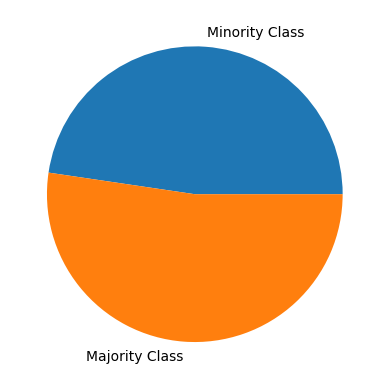

In [ ]:
class_division = [dataset_train[dataset_train['CLASSE'] == 1 ].shape[0], dataset_train[dataset_train['CLASSE'] == 0 ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()

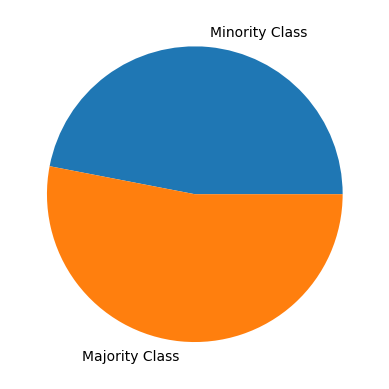

In [ ]:
class_division = [dataset_test[dataset_test['CLASSE'] == 1 ].shape[0], dataset_test[dataset_test['CLASSE'] == 0 ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()

In [ ]:
print("Proportion of Minority Class: " + str(round(dataset_train[dataset_train['CLASSE'] == 1 ].shape[0]/dataset_train.shape[0] * 100, 2)) + "%")

Proportion of Minority Class: 47.67%


In [ ]:
print("Proportion of Minority Class: " + str(round(dataset_test[dataset_test['CLASSE'] == 1 ].shape[0]/dataset_test.shape[0] * 100, 2)) + "%")

Proportion of Minority Class: 46.97%


array([[<Axes: title={'center': 'RENDA'}>,
        <Axes: title={'center': 'VBEM'}>,
        <Axes: title={'center': 'NPARC'}>,
        <Axes: title={'center': 'VPARC'}>,
        <Axes: title={'center': 'IDADE'}>],
       [<Axes: title={'center': 'RESMS'}>,
        <Axes: title={'center': 'ENTRADA'}>,
        <Axes: title={'center': 'CLASSE'}>,
        <Axes: title={'center': 'ESCT_0'}>,
        <Axes: title={'center': 'ESCT_1'}>],
       [<Axes: title={'center': 'ESCT_2'}>,
        <Axes: title={'center': 'ESCT_3'}>,
        <Axes: title={'center': 'NDEP_0'}>,
        <Axes: title={'center': 'NDEP_1'}>,
        <Axes: title={'center': 'NDEP_2'}>],
       [<Axes: title={'center': 'NDEP_3'}>,
        <Axes: title={'center': 'NDEP_4'}>,
        <Axes: title={'center': 'NDEP_5'}>,
        <Axes: title={'center': 'NDEP_6'}>,
        <Axes: title={'center': 'NDEP_7'}>],
       [<Axes: title={'center': 'TIPOR_0'}>,
        <Axes: title={'center': 'TIPOR_1'}>,
        <Axes: title={'center': 

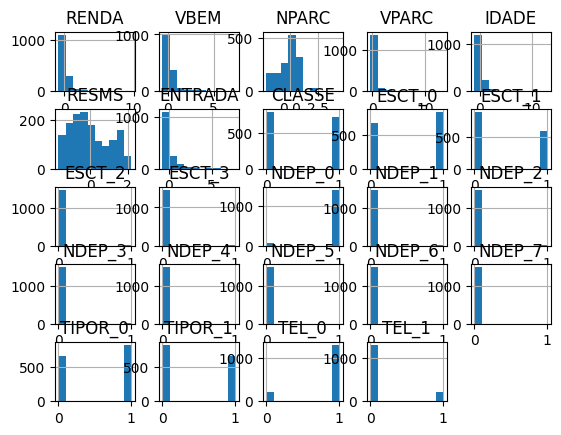

In [ ]:
dataset_train.hist()

array([[<Axes: title={'center': 'RENDA'}>,
        <Axes: title={'center': 'VBEM'}>,
        <Axes: title={'center': 'NPARC'}>,
        <Axes: title={'center': 'VPARC'}>,
        <Axes: title={'center': 'IDADE'}>],
       [<Axes: title={'center': 'RESMS'}>,
        <Axes: title={'center': 'ENTRADA'}>,
        <Axes: title={'center': 'CLASSE'}>,
        <Axes: title={'center': 'ESCT_0'}>,
        <Axes: title={'center': 'ESCT_1'}>],
       [<Axes: title={'center': 'ESCT_2'}>,
        <Axes: title={'center': 'ESCT_3'}>,
        <Axes: title={'center': 'NDEP_0'}>,
        <Axes: title={'center': 'NDEP_1'}>,
        <Axes: title={'center': 'NDEP_2'}>],
       [<Axes: title={'center': 'NDEP_3'}>,
        <Axes: title={'center': 'NDEP_4'}>,
        <Axes: title={'center': 'NDEP_5'}>,
        <Axes: title={'center': 'NDEP_6'}>,
        <Axes: title={'center': 'NDEP_7'}>],
       [<Axes: title={'center': 'TIPOR_0'}>,
        <Axes: title={'center': 'TIPOR_1'}>,
        <Axes: title={'center': 

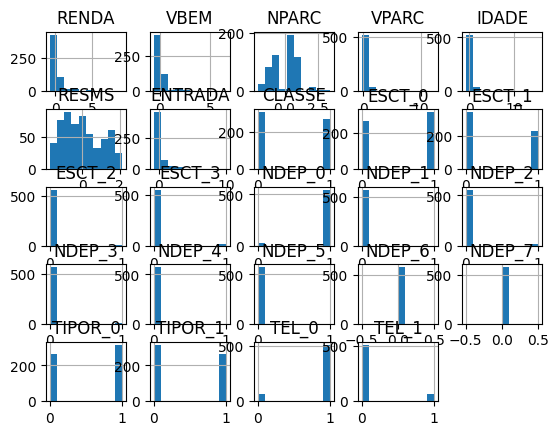

In [ ]:
dataset_test.hist()

In [ ]:
# Criando as variáveis de treino e teste
X_train = dataset_train.drop("CLASSE", axis=1) #retirando o target
y_train = dataset_train["CLASSE"]

X_test = dataset_test.drop("CLASSE", axis=1)
y_test = dataset_test["CLASSE"]

In [ ]:
# Regressão logistica
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Calcular a acurácia do modelo

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_rep = classification_report(y_test, previsoes)
print("Acurácia do modelo:", accuracy)
print("Matriz de confusão:\n", confusion)
print("Report:\n", classification_rep)

Acurácia do modelo: 0.8942807625649913
Matriz de confusão:
 [[295  11]
 [ 50 221]]
Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       306
           1       0.95      0.82      0.88       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.90      0.89      0.89       577



In [ ]:
# Árvore de decisão mantendo os valores de hiperparâmetros default conforme descrito nesta parte do trabalho
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Calcular a acurácia do modelo

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_rep = classification_report(y_test, previsoes)
print("Acurácia do modelo:", accuracy)
print("Matriz de confusão:\n", confusion)
print("Report:\n", classification_rep)

Acurácia do modelo: 0.8682842287694974
Matriz de confusão:
 [[264  42]
 [ 34 237]]
Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       306
           1       0.85      0.87      0.86       271

    accuracy                           0.87       577
   macro avg       0.87      0.87      0.87       577
weighted avg       0.87      0.87      0.87       577



In [ ]:
# Floresta aleatória mantendo os valores de hiperparâmetros default conforme descrito nesta parte do trabalho
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Calcular a acurácia do modelo

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_rep = classification_report(y_test, previsoes)
print("Acurácia do modelo:", accuracy)
print("Matriz de confusão:\n", confusion)
print("Report:\n", classification_rep)

Acurácia do modelo: 0.901213171577123
Matriz de confusão:
 [[298   8]
 [ 49 222]]
Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       306
           1       0.97      0.82      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



In [ ]:
# KNeighborsClassifier mantendo os valores de hiperparâmetros default conforme descrito nesta parte do trabalho
modelo = KNeighborsClassifier()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Calcular a acurácia do modelo

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_rep = classification_report(y_test, previsoes)
print("Acurácia do modelo:", accuracy)
print("Matriz de confusão:\n", confusion)
print("Report:\n", classification_rep)

Acurácia do modelo: 0.8613518197573656
Matriz de confusão:
 [[281  25]
 [ 55 216]]
Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       306
           1       0.90      0.80      0.84       271

    accuracy                           0.86       577
   macro avg       0.87      0.86      0.86       577
weighted avg       0.86      0.86      0.86       577



In [ ]:
# GradientBoostingClassifier mantendo os valores de hiperparâmetros default conforme descrito nesta parte do trabalho
modelo = GradientBoostingClassifier()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Calcular a acurácia do modelo

accuracy = accuracy_score(y_test, previsoes)
confusion = confusion_matrix(y_test, previsoes)
classification_rep = classification_report(y_test, previsoes)
print("Acurácia do modelo:", accuracy)
print("Matriz de confusão:\n", confusion)
print("Report:\n", classification_rep)

Acurácia do modelo: 0.9064124783362218
Matriz de confusão:
 [[297   9]
 [ 45 226]]
Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       306
           1       0.96      0.83      0.89       271

    accuracy                           0.91       577
   macro avg       0.92      0.90      0.90       577
weighted avg       0.91      0.91      0.91       577



INCLUIR UMA CONCLUSÃO SOBRE O RESULTADO DO ITEM 1

# 2 Predição de preços de diamantes (2 pts)

Nessa parte, você deve treinar um modelo de regressão sobre o conjunto de dados *Diamond*.
Esse conjunto de dados (junto com uma descrição dos seus atributos) pode ser obtido em https://www.kaggle.com/shivam2503/diamonds. Em particular, você deve criar um modelo para predizer o valor do preço (representado na variável dependente *price*) de um diamante usando os demais atributos como variáveis independentes.

Repare que o conjunto de dados *Diamond* também contém variáveis não-numéricas. Sendo assim, você também precisará realizar passos de pré-processamento sobre o conjunto de dados antes de iniciar o treinamento do modelo. Para isso, tome como exemplo os passos de préprocessamento realizados sobre o conjunto de dados de clientes.

Você deve criar modelos de predição (regressão) de preços por meio dos algoritmos de aprendizado de máquina implementados nas seguintes classes da biblioteca Scikit-Learn:

* sklearn.linear_model.LinearRegression
* sklearn.linear_model.Lasso
* sklearn.tree.DecisionTreeRegressor
* sklearn.ensemble.RandomForestRegressor
* sklearn.neighbors.KNeighborsRegressor
* sklearn.ensemble.GradientBoostingRegressor

Por simplicidade, você pode manter os valores default dos hiperparâmetros de cada algoritmo.

Após o treinamento, você deve avaliar a qualidade preditiva de cada modelo de classificação resultante. Para isso, você deve separar 20% dos exemplos fornecidos para o conjunto de teste. Isso permitirá que você avalie o quão efetivo foi o treinamento dos modelos. Certifique-se de avaliar todos os modelos sobre o mesmo conjunto de teste. Como métricas de avaliação, use o MSE e o coeficiente e determinação R<sup>2</sup>.

## **About Dataset**
#### **Context**
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

#### **Content**
**price** - price in US dollars (\$326--\$18,823)

**carat** - weight of the diamond (0.2--5.01)

**cut** - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** - diamond colour, from J (worst) to D (best)

**clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** - length in mm (0--10.74)

**y** - width in mm (0--58.9)

**z** - depth in mm (0--31.8)

**depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** - width of top of diamond relative to widest point (43--95)

In [ ]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt #visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Carga do dataset
ds = pd.read_csv("data/diamonds.csv", sep=",")

In [ ]:
# Análise exploratória dos dados de diamantes.
ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
ds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Verificar se existem valores null
ds.isnull().sum().sum()

0

In [ ]:
ds.cut.unique() #precisa ser transformadas

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
ds.color.unique() #precisa ser transformadas

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
ds.clarity.unique() #precisa ser transformadas

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
# Cut, color e clarity são atributos qualitativos e devem ser convertidos em valores numéricos para processamento dos algoritmos.
# Estes atributos são ordinais então seguem uma ordem, então foi utilizado o recurso Ordinal Encoder para fazer esta transformação.

# Listas com valores em ordens dos atributos cut, color e clarity
order_cut = ['Fair','Good', 'Very Good', 'Premium', 'Ideal']
order_color = ['J','I','H','G','F','E','D']
order_clarity = ['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL']

In [ ]:
# transformar o cut em valor numerico de forma ordenada.
order_encod_cut=OrdinalEncoder(categories=[order_cut])
cut_encod = order_encod_cut.fit_transform(ds[['cut']])
ds['cut_encoded'] = cut_encod

ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0


In [ ]:
# transformar o color em valor numerico usando lablel encoding
order_encod_color=OrdinalEncoder(categories=[order_color])
color_encod = order_encod_color.fit_transform(ds[['color']])
ds['color_encoded'] = color_encod

ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4.0,5.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0,5.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,5.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0


In [ ]:
# transformar o cut em valor numerico usando lablel encoding
order_encod_clarity=OrdinalEncoder(categories=[order_clarity])
clarity_encod = order_encod_clarity.fit_transform(ds[['clarity']])
ds['clarity_encoded'] = clarity_encod

ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4.0,5.0,3.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0,5.0,4.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,5.0,6.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0,1.0,5.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,3.0


In [ ]:
# one-hot-encoder para coluna categórica
ds = pd.get_dummies(ds, columns=["cut_encoded", "color_encoded", "clarity_encoded"])

ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_encoded_5.0,color_encoded_6.0,clarity_encoded_2.0,clarity_encoded_3.0,clarity_encoded_4.0,clarity_encoded_5.0,clarity_encoded_6.0,clarity_encoded_7.0,clarity_encoded_8.0,clarity_encoded_9.0
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,True,False,False,True,False,False,False,False,False,False
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,True,False,False,False,True,False,False,False,False,False
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,True,False,False,False,False,False,True,False,False,False
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,False,False,False,False,False,True,False,False,False,False
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carat                53940 non-null  float64
 1   cut                  53940 non-null  object 
 2   color                53940 non-null  object 
 3   clarity              53940 non-null  object 
 4   depth                53940 non-null  float64
 5   table                53940 non-null  float64
 6   price                53940 non-null  int64  
 7   x                    53940 non-null  float64
 8   y                    53940 non-null  float64
 9   z                    53940 non-null  float64
 10  cut_encoded_0.0      53940 non-null  bool   
 11  cut_encoded_1.0      53940 non-null  bool   
 12  cut_encoded_2.0      53940 non-null  bool   
 13  cut_encoded_3.0      53940 non-null  bool   
 14  cut_encoded_4.0      53940 non-null  bool   
 15  color_encoded_0.0    53940 non-null 

In [ ]:
ds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Normalização dos dados
scaler = StandardScaler()

scaled_features = scaler.fit_transform(ds.drop(["price", "cut", "color", "clarity"], axis=1))
ds[ds.columns.difference(["price", "cut", "color", "clarity"])] = scaled_features

ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_encoded_5.0,color_encoded_6.0,clarity_encoded_2.0,clarity_encoded_3.0,clarity_encoded_4.0,clarity_encoded_5.0,clarity_encoded_6.0,clarity_encoded_7.0,clarity_encoded_8.0,clarity_encoded_9.0
0,-1.198168,Ideal,E,SI2,-0.542295,-0.422524,326,-0.321954,-0.269603,-0.185268,...,-0.51456,-0.463594,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,-0.175403,-0.316312,-0.537255
1,-1.240361,Premium,E,SI1,-0.542295,-0.422524,326,-0.321954,-0.269603,-0.185268,...,-0.51456,-0.463594,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,-0.175403,-0.316312,-0.537255
2,-1.198168,Good,E,VS1,-0.542295,2.366727,327,-0.321954,-0.269603,-0.185268,...,-0.51456,-0.463594,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,-0.175403,3.161440,-0.537255
3,-1.071587,Premium,I,VS2,1.844015,-0.422524,334,-0.321954,-0.269603,-0.185268,...,-0.51456,-0.463594,0.454133,0.242928,-1.364971,-1.317305,-1.287720,-0.175403,-0.316312,-0.537255
4,-1.029394,Good,J,SI2,-0.542295,-0.422524,335,-0.321954,-0.269603,-0.185268,...,-0.51456,-0.463594,1.082358,0.242928,-1.240167,-1.212238,-1.117674,-0.175403,3.161440,-0.537255


In [ ]:
# Define as features e o target do dataset (campo price) para predizer o valor
X= ds.drop(["price", "cut", "color", "clarity"],axis =1)
y= ds["price"]

# Separar em teste e treinamento na razão de 20% e 70% treinamento conforme solicitado no trabalho
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Métricas de avaliação

mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print("MSE:", mse)
print("R2:", r2)

MSE: 1288705.4778516733
R2: 0.9189331350419389


In [ ]:
# Lasso
modelo = Lasso()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Métricas de avaliação

mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print("MSE:", mse)
print("R2:", r2)

MSE: 1288431.6867467202
R2: 0.918950358051318


In [ ]:
# DecisionTreeRegressor
modelo = DecisionTreeRegressor()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Métricas de avaliação

mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print("MSE:", mse)
print("R2:", r2)

MSE: 545708.0440072302
R2: 0.9656718768792619


In [ ]:
# RandomForestRegressor
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Métricas de avaliação

mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print("MSE:", mse)
print("R2:", r2)

MSE: 304592.6552979135
R2: 0.9808393988551857


In [ ]:
# KNeighborsRegressor
modelo = KNeighborsRegressor()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Métricas de avaliação

mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print("MSE:", mse)
print("R2:", r2)

MSE: 671820.1900482017
R2: 0.9577387094578603


In [ ]:
# GradientBoostingRegressor
modelo = GradientBoostingRegressor()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Métricas de avaliação

mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print("MSE:", mse)
print("R2:", r2)

MSE: 517475.9583411489
R2: 0.9674478347808237


In [ ]:
# GradientBoostingRegressor
modelo = GradientBoostingRegressor()
modelo.fit(X_train, y_train)

# Prever os valores para o dataset de teste
previsoes = modelo.predict(X_test)

# Métricas de avaliação

mse = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print("MSE:", mse)
print("R2:", r2)

MSE: 517475.95834114915
R2: 0.9674478347808237


INCLUIR UMA CONCLUSÃO SOBRE O RESULTADO DO ITEM 2

#3 Conjuntos desbalanceados - parte I (1,5 pts)
Nesta parte do trabalho, são fornecidos cinco arquivos no formato Pickle, cada um dos quais produzido a partir de uma fonte de dados diferente: A602.pickle, A621.pickle, A627.pickle, A636.pickle, A652.pickle. Cada um desses arquivos contém conjuntos de treino, validação e testes da fonte de dados correspondente.<sup>1</sup> O trecho de código abaixo ilustra como é possível ter acesso aos conjuntos de dados para cada fonte. Nesse trecho de código, outfilename é o nome de um dos cinco arquivo fornecidos.

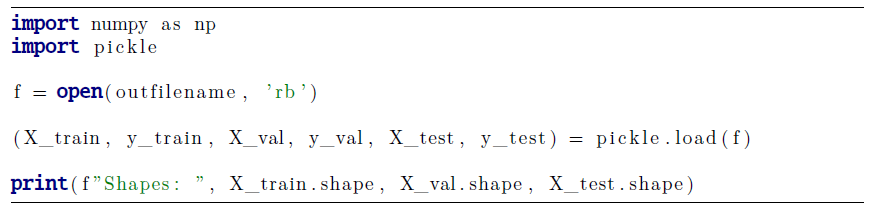

Você vai notar ao inspecionar as matrizes y_* de cada fonte que esses são conjuntos de dados para um problema de regressão (porque o alvo é um valor contínuo). Entretanto, nesta parte do trabalho, você deve alterar o alvo para gerar conjuntos de dados para classificação binária. Para isso, faça o seguinte, para cada arquivo fornecido. Se o alvo for igual a 0, altere para o rótulo 0; em caso contrário, altere para o rótulo 1. Após realizar essa transformação, você deve notar que os conjuntos de dados resultantes são extremamente desbalanceados.

Após realizar a transformação descrita acima, você deve investigar se a aplicação de alguma técnica de balanceamento de dados é efetiva no sentido de produzir um modelo de classificação que tenha maior desempenho preditivo. Ou seja, você vai comparar se um modelo treinado sem aplicar balanceamento é pior ou melhor (do ponto de vista preditivo) do que um modelo treinado após a aplicação de alguma técnica de balanceamento. Você deve obrigatoriamente testar as três alternativas de solução descritas em aula (undersampling, oversampling e alteração de limiar), mas está livre para testar outras, se quiser. Faça essa investigação utilizando um único algoritmo de aprendizado, a saber, o sklearn.ensemble.GradientBoostingClassifier. Em sua análise dos resultados para cada fonte, forneça as matrizes de confusão obtidas, assim como os relatórios de classificação obtidos por meio da função classification_report do Scikit-Learn.

<sup>1</sup>A fonte desses dados e o modo pelo qual eles foram pré-processados para geração desse conjunto são aspectos
irrelevantes para o que deve ser feito neste trabalho. Contudo, isso será alvo de estudo em aulas futuras do
curso.

In [ ]:
# Importar as bibliotecas
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Ler todos arquivos pickle de um diretório e unir em um dataframe pandas

# Caminho do diretório
dir = "data/atmoseer/"

# Lista para armazenar os dataframes
#df_list = []

# Iterar sobre os arquivos no diretório
for index, filename in enumerate(os.listdir(dir)):
  print(filename)
  with open(filename, 'rb') as f:
    contents = pickle.load(f)
  # Carregar o dataframe do arquivo pickle
  #df = pd.read_pickle(os.path.join(dir, filename))
  if (flag):
    (X_train_0 , y_train_0 , X_val_0 , y_val_0 , X_test_0 , y_test_0 ) = contents
    flag = False
  else:
    (X_train_i , y_train_i , X_val_i , y_val_i , X_test_i , y_test_i ) = contents
    # Adicionar conteúdo do arquivo pickle acumulando valores
    X_train_0 = np.vstack((X_train_0, X_train_i))
    y_train_0 = np.vstack((y_train_0, y_train_i))

    X_val_0 = np.vstack((X_val_0, X_val_i))
    y_val_0 = np.vstack((y_val_0, y_val_i))

    X_test_0 = np.vstack((X_test_0, X_test_i))
    y_test_0 = np.vstack((y_test_0, y_test_i))
    # Adicionar o dataframe à lista
    #df_list.append(df)

# Converter as matrizes para dataframes
X_train = pd.DataFrame(X_train_0)
y_train = pd.DataFrame(y_train_0)

X_val = pd.DataFrame(X_val_0)
y_val = pd.DataFrame(y_val_0)

X_test = pd.DataFrame(X_test_0)
y_test = pd.DataFrame(y_test_0)


FileNotFoundError: [Errno 2] No such file or directory: 'data/atmoseer/'